**Завдання 1**

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models , regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [ ]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape=(28,28,1)),
    # Перший згортковий шар
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Другий згортковий шар
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Третій згортковий шар
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Четвертий згортковий шар
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    # Перший повнозв'язний шар
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    # Другий повнозв'язний шар
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=1e-6)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop,reduce_lr]
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7905 - loss: 0.6305 - val_accuracy: 0.8922 - val_loss: 0.2993 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8909 - loss: 0.3022 - val_accuracy: 0.9051 - val_loss: 0.2611 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9040 - loss: 0.2629 - val_accuracy: 0.9202 - val_loss: 0.2226 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9164 - loss: 0.2335 - val_accuracy: 0.9171 - val_loss: 0.2284 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9195 - loss: 0.2172 - val_accuracy: 0.9178 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9287 - loss: 0.1941 - val_accuracy: 0.9252 - val_loss: 0.2049 - learning_rate: 0.0010
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9312 - loss: 0.1887 

In [ ]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9374 - loss: 0.1916
Test accuracy: 0.9362999796867371
Test loss: 0.1885259449481964


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,615,488 (9.98 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 1,743,062 (6.65 MB)

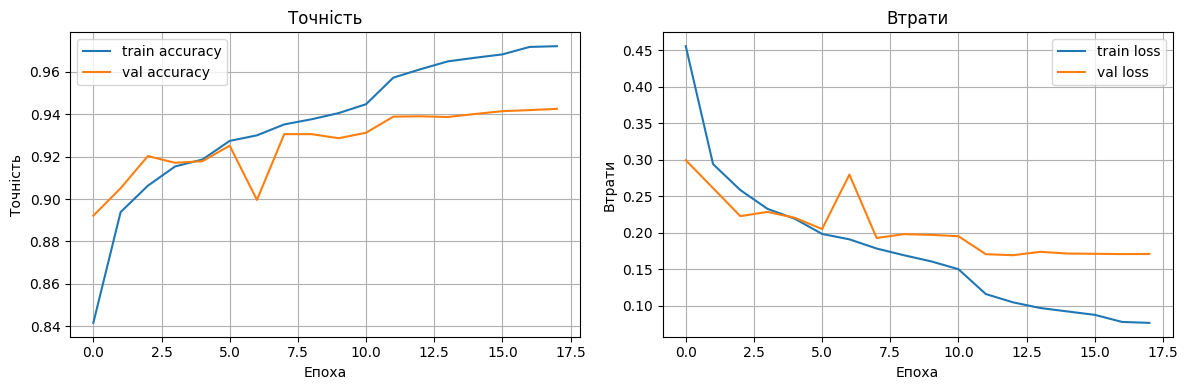

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Передбачення на всіх даних
predictions = model.predict(x_test)
pred_classes = np.argmax(predictions, axis=1)
# Назви класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(classification_report(y_test, pred_classes, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.88      0.89      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.91      0.91      0.91      1000
       Dress       0.93      0.95      0.94      1000
        Coat       0.89      0.91      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.81      0.80      0.81      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



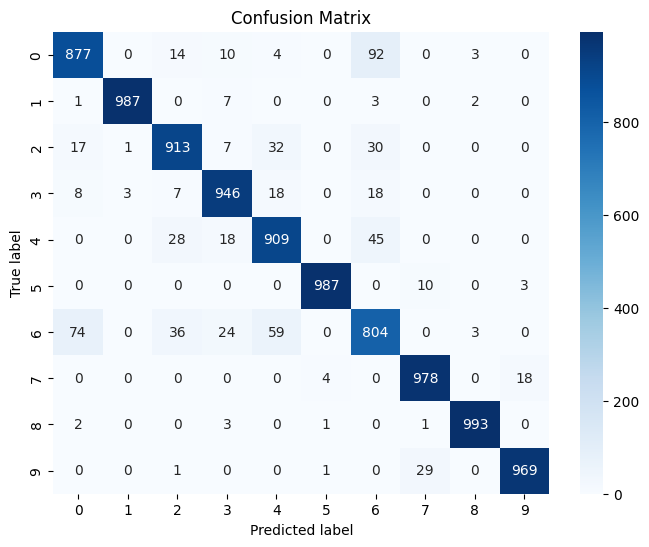

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


matrix_confusion = confusion_matrix(y_test, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Справжні класи [6 4 7 8 7 3 0 0 6 1 5 6 5 6 4 6 0 9 7 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Прогнозовані класи [6 4 7 8 7 3 0 6 6 1 5 6 5 6 4 6 0 9 7 4]


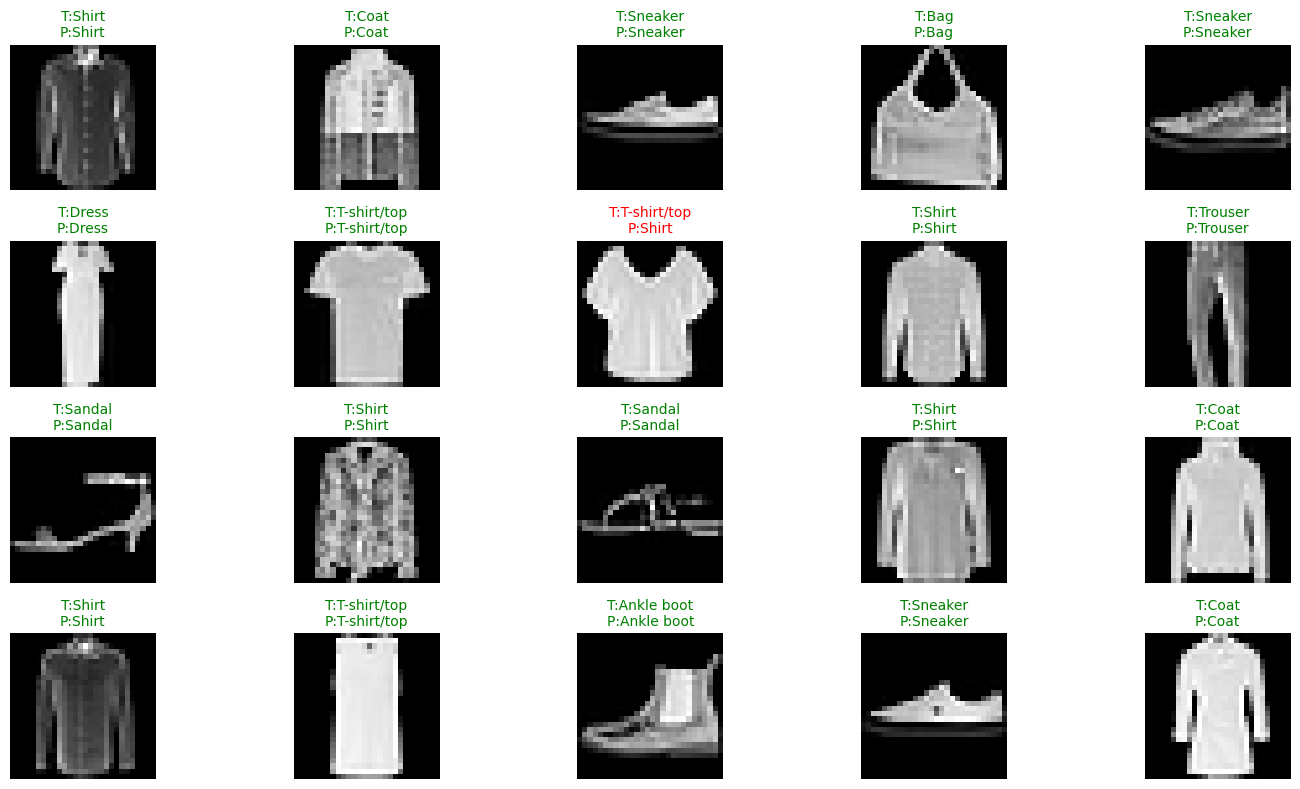

In [ ]:

num_images = 20

# Рандомні індекси з тестового набору
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)
# беремо випадкові зображення  по отриманим індексам з random_indices
images = x_test[random_indices]
# справжні мітки які відповідають індексам конкретних випадкових зображень
true_labels = y_test[random_indices]
print("Справжні класи" , true_labels)
# Передбачення моделі для 20 тестових зображень
predictions = model.predict(images)
pred_classes = np.argmax(predictions, axis=1)
print("Прогнозовані класи",pred_classes)

# Візуалізація
plt.figure(figsize=(15, 8))
cols = 5
rows = (num_images + cols - 1) // cols
for i in range(num_images):
    plt.subplot(rows, cols, i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    color = "green" if pred_classes[i] == true_labels[i] else "red"
    plt.title(f"T:{class_names[true_labels[i]]}\nP:{class_names[pred_classes[i]]}", color=color, fontsize=10)

plt.tight_layout()
plt.show()

**ВИСНОВОК**: Згорткова нейронна мережа значно перевершує звичайну багатошарову MLP модель.  
MLP модель: **accuracy ~89%**, тоді як CNN модель: **accuracy ~94%** на тестових даних.

**ЗАВДАННЯ 2**

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [4]:
# Завантаження
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# VGG16 була навчена на датасеті ImageNet.VGG16 очікує 3 канали
# Робимо 3 канали і приведення до типу float
x_train = x_train[..., np.newaxis].astype("float32") / 255.0
x_test  = x_test[..., np.newaxis].astype("float32") / 255.0

In [5]:
#  Параметри Dataset
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (80, 80))
    image = tf.repeat(image, repeats=3, axis=-1)
    return image, label

In [6]:
# Створюємо tf.data.Dataset
train_ds_full = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds_full = train_ds_full.map(preprocess).shuffle(2000)

# 20% валідаційні дані (60000/100*20)
val_size = 12000
val_ds = train_ds_full.take(val_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_ds = train_ds_full.skip(val_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
# 4. Модель с VGG16
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(80,80,3))
# Fine-tuning останнього блока (block5)
for layer in vgg_base.layers: # заморожуємо всі шари VGG16
    layer.trainable = False
for layer in vgg_base.layers[15:]: #розморожуємо тільки верхні шари (block5)
    layer.trainable = True

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
vgg_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 80, 80, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [9]:
model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 57ms/step - accuracy: 0.6956 - loss: 0.8997 - val_accuracy: 0.8869 - val_loss: 0.3118 - learning_rate: 1.0000e-05
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 58ms/step - accuracy: 0.8833 - loss: 0.3403 - val_accuracy: 0.9004 - val_loss: 0.2757 - learning_rate: 1.0000e-05
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.8978 - loss: 0.2873 - val_accuracy: 0.9157 - val_loss: 0.2347 - learning_rate: 1.0000e-05
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.9108 - loss: 0.2536 - val_accuracy: 0.9173 - val_loss: 0.2263 - learning_rate: 1.0000e-05
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.9189 - loss: 0.2317 - val_accuracy: 0.9198 - val_loss: 0.2259 - learning_rate: 1.0000e-05
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 58ms/step - accuracy: 0.9228 - loss: 0.2162 - val_accuracy: 0.9254 - val_loss: 0.2103 - learning_rate: 1.0000e-05
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━

In [15]:
model.evaluate(test_ds, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9233 - loss: 0.2173


[0.21642278134822845, 0.9208999872207642]

In [14]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9233 - loss: 0.2173
Test accuracy: 0.9208999872207642


In [19]:
# 1. Збереження навчаної моделі
# model.save("VGG16.keras")
# 2. Скачування моделі локально на диск
# from google.colab import files
# files.download("VGG16.keras")

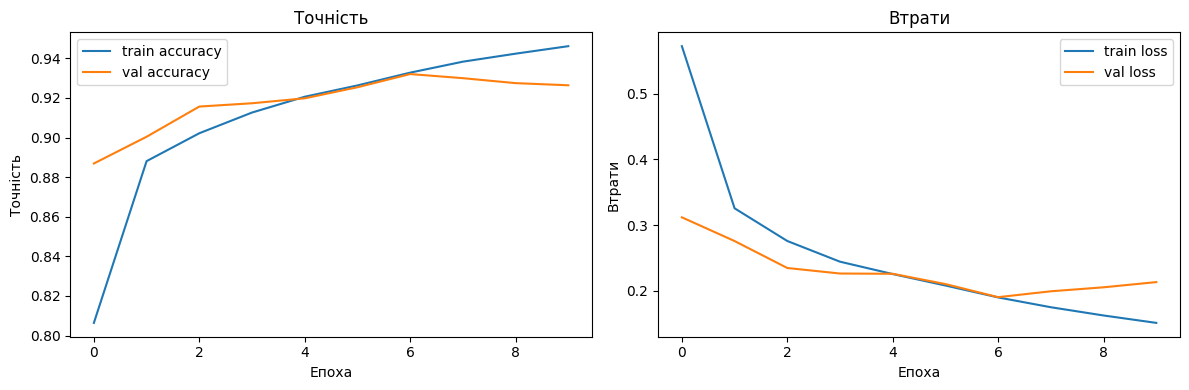

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

**ВИСНОВКИ:**  1. Звичайна згорткова модель CNN швидше навчається і досягла точності класифікації на тестових даних **accuracy 94%**. 2) Модель на основі VGG16 в якості згорткової основи показала гіршу точність на тестових даних **accuracy 92%** і при цьому вимагала більше обчислювальних ресурсів і значно більше часу навчання.